In [ ]:
import tensorflow as tf 
tf.__version__

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1 

In [ ]:
plt.plot(series)
# plt.show()

### Build a dataset

In [ ]:
T = 10
X = []
Y = []

In [ ]:
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [ ]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

In [ ]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

In [ ]:
model.compile(loss='mse', optimizer=Adam(lr=0.1))

In [ ]:
# train the model
# X:학습데이터, Y:정답데이터, epochs=80, validation_data:검증 데이터 
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### "Wrong" forecast usring true targets

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

In [ ]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input 
last_x = X[-N//2]

In [ ]:
print(len(validation_target))
print(last_x)

In [ ]:
print(last_x.reshape(1, -1))

In [ ]:
print(model.predict(last_x.reshape(1, -1))[0,0])

In [ ]:
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

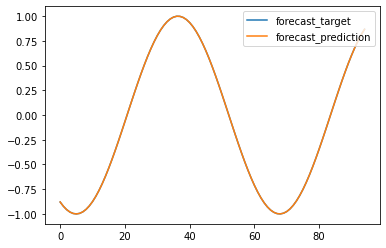

In [41]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

### Noise examples

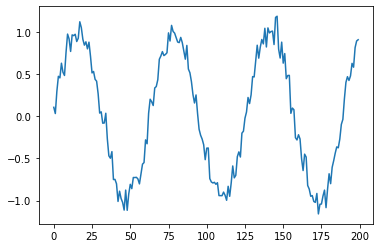

In [43]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()